In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import missingno as msno
import os

In [2]:
data_dir = '/opt/ml/input/data/'
csv_file_path = os.path.join(data_dir, 'train_data_user_fe.csv')
df = pd.read_csv(csv_file_path) 
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,year,month,day,hour,...,user_acc,user_test_ans_count,user_test_ans_1,user_test_acc,user_test_lvl_mean,user_tag_ans_count,user_tag_ans_1,user_tag_acc,user_tag_lvl_mean,user_lvl
0,0,A060001001,A060000001,1,1585009031,7224,2020,3,24,0,...,NaN,0,NaN,NaN,23.794164,0,NaN,NaN,16.321821,40.115985
1,0,A060001002,A060000001,1,1585009034,7225,2020,3,24,0,...,1.000000,1,1.0,1.00,23.794164,0,NaN,NaN,24.112226,47.906390
2,0,A060001003,A060000001,1,1585009042,7225,2020,3,24,0,...,1.000000,2,2.0,1.00,23.794164,1,1.0,1.00,26.709028,50.503192
3,0,A060001004,A060000001,1,1585009049,7225,2020,3,24,0,...,1.000000,3,3.0,1.00,23.794164,2,2.0,1.00,28.007429,51.801593
4,0,A060001005,A060000001,1,1585009056,7225,2020,3,24,0,...,1.000000,4,4.0,1.00,23.794164,3,3.0,1.00,28.786469,52.580634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,1591339821,438,2020,6,5,6,...,0.250000,4,1.0,0.25,76.534202,4,1.0,0.25,73.254797,149.788999
2266582,7441,A040165001,A040000165,1,1597971999,8836,2020,8,21,1,...,0.200000,0,NaN,NaN,75.711881,0,NaN,NaN,71.463582,147.175463
2266583,7441,A040165002,A040000165,1,1597972010,8836,2020,8,21,1,...,0.333333,1,1.0,1.00,75.124510,1,1.0,1.00,70.184142,145.308652
2266584,7441,A040165003,A040000165,1,1597972056,8836,2020,8,21,1,...,0.428571,2,2.0,1.00,74.683981,2,2.0,1.00,69.224562,143.908543


In [130]:
df.columns

Index(['userID', 'assessmentItemID', 'testId', 'answerCode', 'Timestamp',
       'KnowledgeTag', 'year', 'month', 'day', 'hour', 'wday', 'retry', 'time',
       'time_class', 'time_class_mean', 'time_class_sum', 'time_class_std',
       'test_ans_mean', 'test_ans_sum', 'test_ans_std', 'test_time_mean',
       'test_time_std', 'test_type', 't_type_ans_mean', 't_type_ans_sum',
       't_type_ans_std', 't_type_time_mean', 't_type_time_std', 'test_lvl',
       'test_lvl_cat', 'test_type_lvl', 'test_type_lvl_cat',
       'test_total_answer', 'tag_ans_mean', 'tag_ans_sum', 'tag_ans_std',
       'tag_time_mean', 'tag_time_std', 'tag_lvl', 'tag_lvl_cat',
       'tag_total_answer', 'user_ans_1', 'user_total_ans', 'user_acc',
       'user_test_ans_count', 'user_test_ans_1', 'user_test_acc',
       'user_test_lvl_mean', 'user_tag_ans_count', 'user_tag_ans_1',
       'user_tag_acc', 'user_tag_lvl_mean', 'user_lvl'],
      dtype='object')

In [13]:
pd.qcut(df.time[df.time > 5],4)

1          (5.999, 22.0]
2          (5.999, 22.0]
3          (5.999, 22.0]
4          (5.999, 22.0]
5           (22.0, 27.0]
               ...      
2266581     (22.0, 27.0]
2266582    (5.999, 22.0]
2266583     (27.0, 64.0]
2266584    (64.0, 300.0]
2266585     (22.0, 27.0]
Name: time, Length: 1932711, dtype: category
Categories (4, interval[float64, right]): [(5.999, 22.0] < (22.0, 27.0] < (27.0, 64.0] < (64.0, 300.0]]

<Axes: >

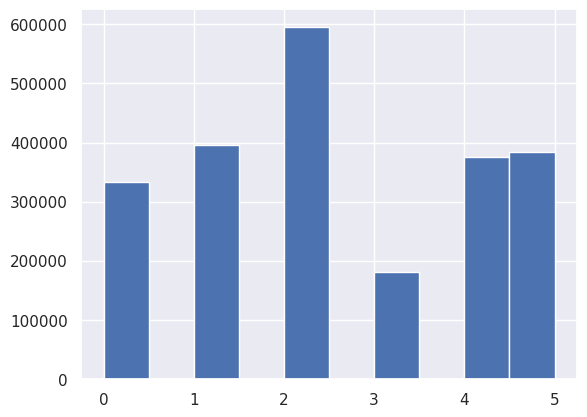

In [126]:
df['time_class'].hist()

In [10]:
# pd.qcut(df.user_lvl,5)
# df['user_lvl_cat'] = pd.qcut(df.user_lvl,5,labels=[0,1,2,3,4])
df['user_lvl_cat'] = pd.qcut(df.user_lvl,5)
# df.groupby(['user_lvl_cat'])['answerCode'].agg('mean').hist()
df.groupby(['user_lvl_cat'])['answerCode'].agg('mean')

user_lvl_cat
(40.115, 144.697]     0.730236
(144.697, 159.538]    0.682540
(159.538, 171.432]    0.631832
(171.432, 183.592]    0.610246
(183.592, 419.073]    0.617038
Name: answerCode, dtype: float64

In [18]:
df.groupby(['test_lvl_cat'])['answerCode'].agg('mean')

test_lvl_cat
0    0.848503
1    0.793377
2    0.729123
3    0.680479
4    0.643739
5    0.611736
6    0.595218
7    0.547935
8    0.566284
9    0.525667
Name: answerCode, dtype: float64

In [20]:
df.groupby(['wday'])['answerCode'].agg('mean')

wday
0    0.676518
1    0.667046
2    0.641011
3    0.658466
4    0.643362
5    0.603206
6    0.675257
Name: answerCode, dtype: float64

In [14]:
df.groupby(['retry'])['answerCode'].agg('mean')

retry
0.0    0.654647
1.0    0.645138
2.0    0.438849
Name: answerCode, dtype: float64

In [15]:
df.retry.value_counts()

retry
0.0    2220633
1.0      45119
2.0        834
Name: count, dtype: int64